In [138]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

from __future__ import division

%matplotlib inline

Desk has a "Business Insights" tool which offers CSV files of reportint data

In [139]:
# Load the Desk_Business_Insights_Data.csv as a pandas DataFrame 
df = pd.read_csv("Desk_Business_Insights_Data.csv")

In [140]:
df.head()

,Day Count,Date/Time,Created Cases,Resolved Cases,Average Time to First Response,Agent Replies Per Resolve,Average Handle Time,Average Time to Resolution,FCR Rate,Inbound Interactions,Outbound Interactions,Resolved w/o Response,Case Resolves,% Cases Reopened,Case Reopens,Case Deletes,CSat
0,1,Sat 03/21/2015,40,0,NaN,0.0,0:00:00,0:00:00,NaN,54,0,0,0,0.00%,11,0,1.00
1,2,Fri 03/20/2015,204,235,3:58:49,1.6,0:04:21,23:04:34,81.76%,312,264,8,294,62.01%,111,0,0.86
2,3,Thu 03/19/2015,199,257,5:38:41,1.6,0:06:26,17:29:42,67.91%,314,293,11,324,60.80%,121,0,0.95
3,4,Wed 03/18/2015,266,286,5:20:22,1.5,0:06:23,18:27:10,70.89%,432,344,10,398,65.02%,158,0,0.91
4,5,Tue 03/17/2015,241,263,3:21:25,1.4,0:06:28,16:55:52,70.49%,390,295,12,350,82.35%,154,0,0.94


In [141]:
df.columns

Index([u'Day Count', u'Date/Time', u'Created Cases', u'Resolved Cases', u'Average Time to First Response', u'Agent Replies Per Resolve', u'Average Handle Time', u'Average Time to Resolution', u'FCR Rate', u'Inbound Interactions', u'Outbound Interactions', u'Resolved w/o Response', u'Case Resolves', u'% Cases Reopened', u'Case Reopens', u'Case Deletes', u'CSat'], dtype='object')

In [142]:
df = df.rename(columns={'Day Count': 'Day_Count', 'Date/Time': 'Date_Time', 'Created Cases': 'Created_Cases',
                        'Resolved Cases': 'Resolved_Cases','Average Time to First Response': 
                        'Average_Time_to_First_Response'})

In [143]:
df.columns

Index([u'Day_Count', u'Date_Time', u'Created_Cases', u'Resolved_Cases', u'Average_Time_to_First_Response', u'Agent Replies Per Resolve', u'Average Handle Time', u'Average Time to Resolution', u'FCR Rate', u'Inbound Interactions', u'Outbound Interactions', u'Resolved w/o Response', u'Case Resolves', u'% Cases Reopened', u'Case Reopens', u'Case Deletes', u'CSat'], dtype='object')

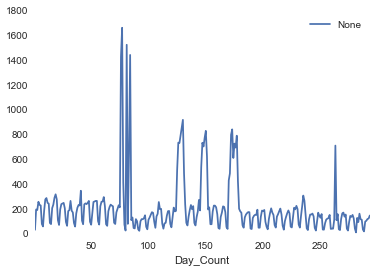

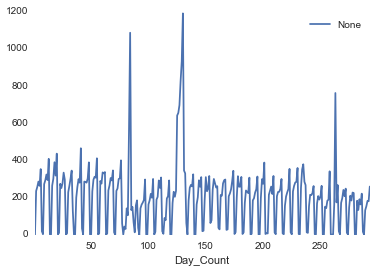

In [144]:
df.plot(x='Day_Count', y='Created_Cases')
df.plot(x='Day_Count', y='Resolved_Cases')

So, I wrote a python script to pull information from Desk's API. The API returns a lot of information:

{u'labels': [], u'updated_at': u'2015-02-01T00:03:37Z', u'locked_until': None, u'received_at': u'2015-02-01T00:03:37Z', u'active_attachments_count': 0, u'id': 176988, u'custom_fields': {u'priority_support': None, u'emailformdropdown': u'Email Integration', u'ticket_groups': None, u'big_team': None}, u'subject': u'This is only a test. A robot test!', u'has_pending_interactions': False, u'changed_at': u'2015-02-01T00:03:37Z', u'priority': 4, u'opened_at': None, u'active_at': None, u'_links': {u'customer': {u'href': u'/api/v2/customers/260038203', u'class': u'customer'}, u'locked_by': None, u'attachments': {u'count': 0, u'href': u'/api/v2/cases/176988/attachments', u'class': u'attachment'}, u'self': {u'href': u'/api/v2/cases/176988', u'class': u'case'}, u'labels': {u'href': u'/api/v2/cases/176988/labels', u'class': u'label'}, u'feedbacks': None, u'case_links': {u'href': u'/api/v2/cases/176988/links', u'class': u'case_link'}, u'notes': {u'count': 0, u'href': u'/api/v2/cases/176988/notes', u'class': u'note'}, u'draft': {u'href': u'/api/v2/cases/176988/replies/draft', u'class': u'reply'}, u'replies': {u'count': 0, u'href': u'/api/v2/cases/176988/replies', u'class': u'reply'}, u'macro_preview': {u'href': u'/api/v2/cases/176988/macros/preview', u'class': u'macro_preview'}, u'message': {u'href': u'/api/v2/cases/176988/message', u'class': u'email'}, u'assigned_user': None, u'assigned_group': {u'href': u'/api/v2/groups/19411', u'class': u'group'}, u'history': {u'href': u'/api/v2/cases/176988/history', u'class': u'history'}}, u'type': u'email', u'blurb': u"From: Krause Robot Test\nCategory: Email Integration\nBrowser: Safari\nOS: Linux\nMessage: We need to setup things that route this out of our queues and metrics - but somewhere where we'll notice if they aren't coming through hourly.\n\n\n", u'status': u'closed', u'first_resolved_at': None, u'description': None, u'label_ids': [], u'active_notes_count': 0, u'resolved_at': None, u'language': None, u'created_at': u'2015-02-01T00:03:37Z', u'has_failed_interactions': False, u'external_id': None, u'first_opened_at': None}

I only needed some of this, but times had to be converted to local time (SF) and I had to clean that data for anomolies like cases which had no created time, no group, etc. 

https://github.com/alharmon13/DAT_SF_12/blob/gh-pages/project/write_desk_data_to_csv.py

In [145]:
# Load the data from the Desk API as a pandas DataFrame 
data = pd.read_csv("June_6_2014-March_20_2015-Desk_Data.csv")

In [146]:
data.head()

,case_id,created_at_date,created_at_time,resolved_at_time,tfr
0,110939,2014-06-02 01:26:16+00:00,18:26:16,11:20:23,16.901944
1,110940,2014-06-02 01:39:24+00:00,18:39:24,10:29:07,15.828611
2,110941,2014-06-02 02:31:46+00:00,19:31:46,10:31:23,14.993611
3,110942,2014-06-02 02:56:20+00:00,19:56:20,13:18:35,17.370833
4,110943,2014-06-02 03:18:17+00:00,20:18:17,10:48:12,14.498611


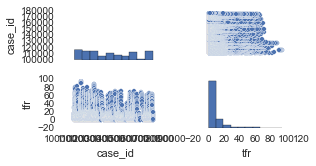

In [156]:
sns.pairplot(data, size = 1.2, aspect=1.75)

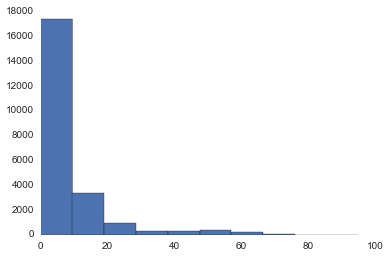

In [158]:
data['tfr'].hist()